# Introduction



time series forecasting is a component of data analysis in various industries such as finance, retail, and meteorology.Old methods like ARIMA, Exponential Smoothing, or even simple linear regression have dominated this field.these methods often struggle with complex patterns and non-linear relationships inherent in many time series datasets.XGBoost, a powerful machine learning algorithm known for its performance in term of speed and accurancy.It is often used in classification and regression problems.

In [3]:
#importing required packages
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import warnings 
warnings.simplefilter("ignore")

In [4]:
df = pd.read_csv("ALIBABA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,216.600006,219.979996,216.539993,219.770004,216.854889,15873500
1,2020-01-03,216.350006,218.203003,216.009995,217.000000,214.121628,8604500
2,2020-01-06,214.889999,217.160004,214.089996,216.639999,213.766403,11885500
3,2020-01-07,217.639999,218.940002,216.690002,217.630005,214.743286,9388000
4,2020-01-08,216.600006,220.649994,216.320007,218.000000,215.108368,11959100


# Data Cleaning

In [5]:
missing_values = df.isnull().sum()
data_types = df.dtypes

print(missing_values,data_types)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64 Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [6]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [7]:
# Calculate descriptive statistics for the dataset
descriptive_statistics = df.describe()

# Display the descriptive statistics
descriptive_statistics

,Date,Open,High,Low,Close,Adj Close,Volume
count,1089,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1.089000e+03
mean,2022-02-28 20:36:21.818181888,150.177948,152.207784,147.879644,150.054242,148.144197,2.110515e+07
min,2020-01-02 00:00:00,63.200001,64.099998,58.009998,63.150002,62.312359,6.231400e+06
25%,2021-02-01 00:00:00,86.970001,88.379997,85.650002,86.889999,85.737457,1.355850e+07
50%,2022-03-01 00:00:00,116.750000,119.709999,114.300003,117.239998,115.684883,1.788920e+07
75%,2023-03-30 00:00:00,216.350006,218.229996,213.500000,216.639999,213.766403,2.365050e+07
max,2024-04-30 00:00:00,313.500000,319.320007,308.910004,317.140015,312.933350,1.598343e+08
std,NaN,71.933817,72.514735,71.024513,71.831161,70.792959,1.359273e+07


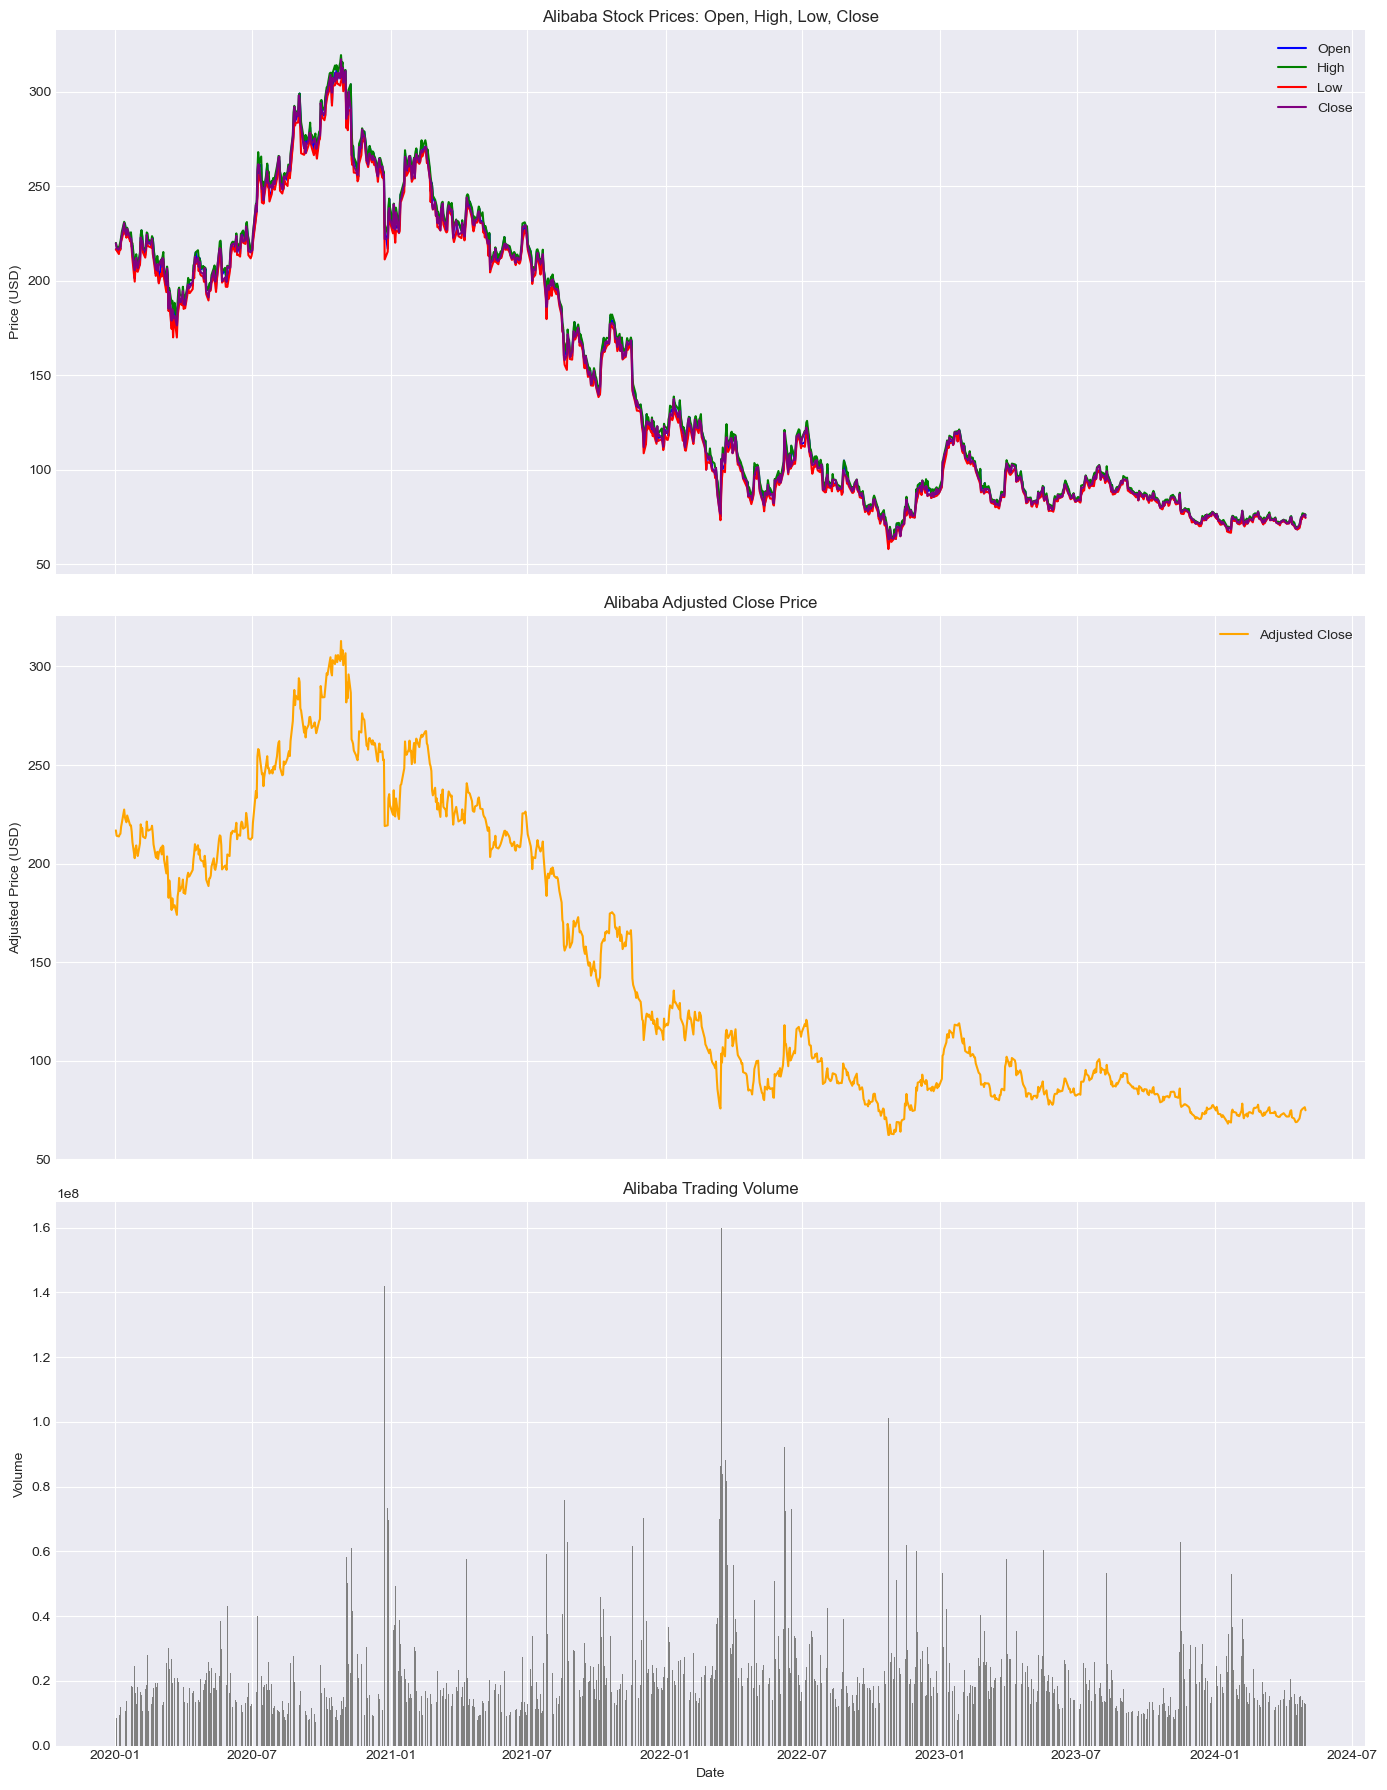

In [8]:
# Set the style of matplotlib
plt.style.use('seaborn-darkgrid')

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 18), sharex=True)

# Plotting price data
axes[0].plot(df['Date'], df['Open'], label='Open', color='blue')
axes[0].plot(df['Date'], df['High'], label='High', color='green')
axes[0].plot(df['Date'], df['Low'], label='Low', color='red')
axes[0].plot(df['Date'], df['Close'], label='Close', color='purple')
axes[0].set_title('Alibaba Stock Prices: Open, High, Low, Close')
axes[0].set_ylabel('Price (USD)')
axes[0].legend()

# Plotting adjusted close price
axes[1].plot(df['Date'], df['Adj Close'], label='Adjusted Close', color='orange')
axes[1].set_title('Alibaba Adjusted Close Price')
axes[1].set_ylabel('Adjusted Price (USD)')
axes[1].legend()

# Plotting volume
axes[2].bar(df['Date'], df['Volume'], color='grey')
axes[2].set_title('Alibaba Trading Volume')
axes[2].set_ylabel('Volume')
axes[2].set_xlabel('Date')

# Tight layout to ensure no overlap
plt.tight_layout()

# Show the plots
plt.show()


## Stock Prices (Open, High, Low, Close):

The first plot displays the daily opening, highest, lowest, and closing stock prices. You can see the variations and trends over time, giving back the market behavior and events affecting stock prices.

## Adjusted Close Price:

The second plot presents adjusted closing price, which accounts for corporate actions.This is often used for performance analysis over time.

## Trading Volume:

The third plot shows the trading volume, indicating the number of shares traded each day. High volume days often linked with significant price movements or news events.

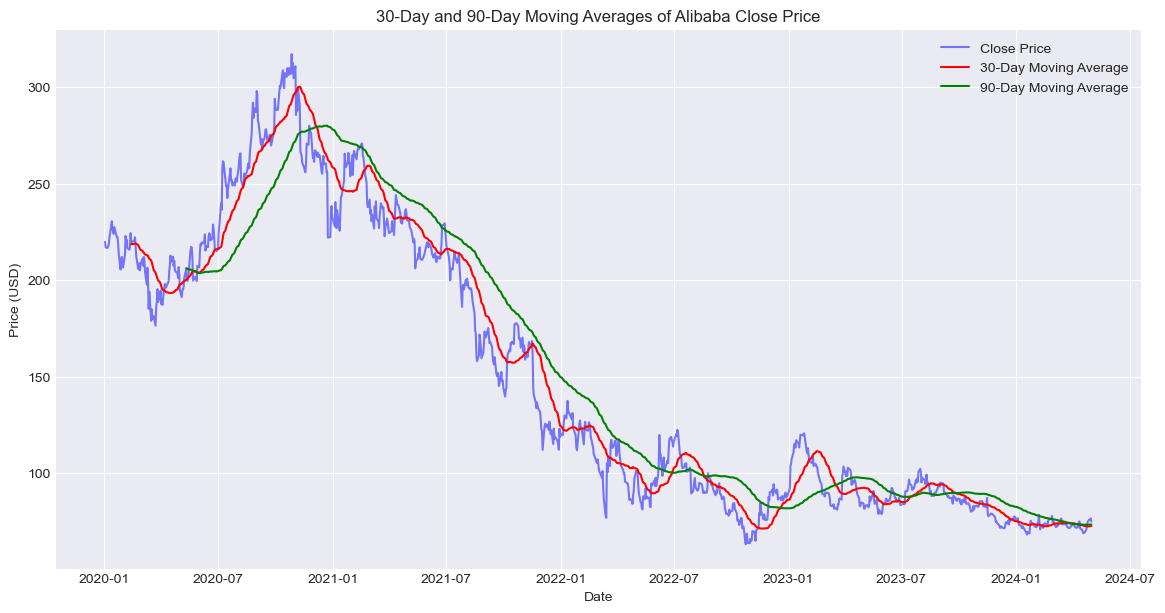

In [9]:
# moving averages calculation
df['30_day_MA'] = df['Close'].rolling(window=30).mean()
df['90_day_MA'] = df['Close'].rolling(window=90).mean()

# Plotting the moving averages along with the close price
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(df['Date'], df['30_day_MA'], label='30-Day Moving Average', color='red')
plt.plot(df['Date'], df['90_day_MA'], label='90-Day Moving Average', color='green')
plt.title('30-Day and 90-Day Moving Averages of Alibaba Close Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

## Specific Time Period Analysis for 2020

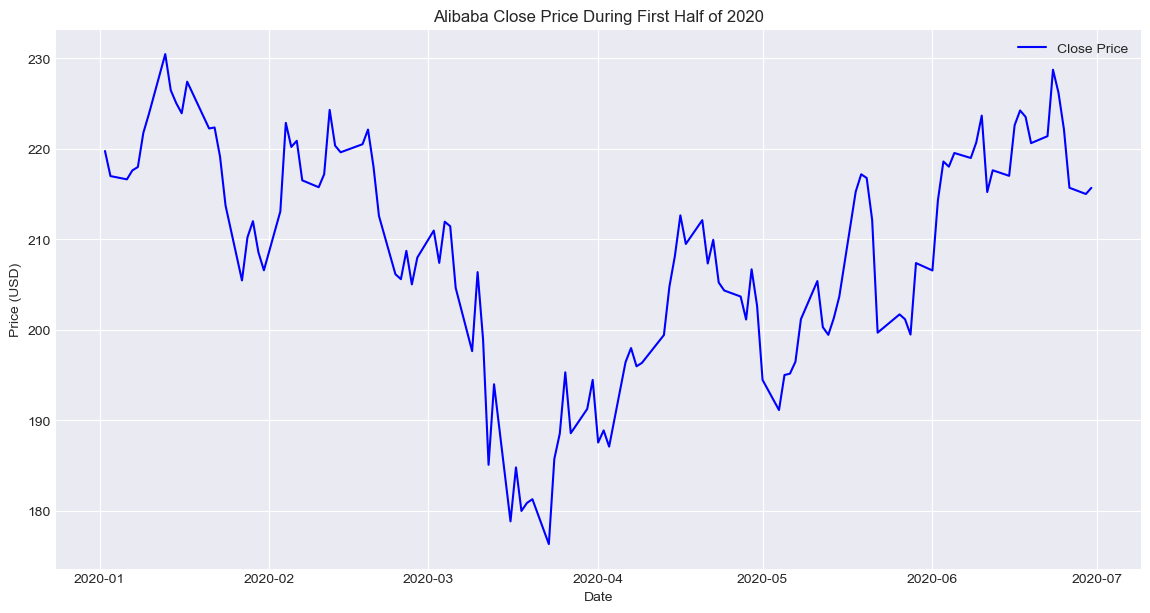

In [10]:
# Specific time period analysis for the first half of 2020
start_date = '2020-01-01'
end_date = '2020-06-30'
period_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Plotting the close price for this period
plt.figure(figsize=(14, 7))
plt.plot(period_df['Date'], period_df['Close'], label='Close Price', color='blue')
plt.title('Alibaba Close Price During First Half of 2020')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


The plot shows Alibaba's stock close price during the initial months of the COVID-19 pandemic (January to June 2020). This period captures the market's reaction to the onset of the pandemic, with visible volatility and significant price movements during March and April 2020.

## Distribution of Daily Percentage Changes

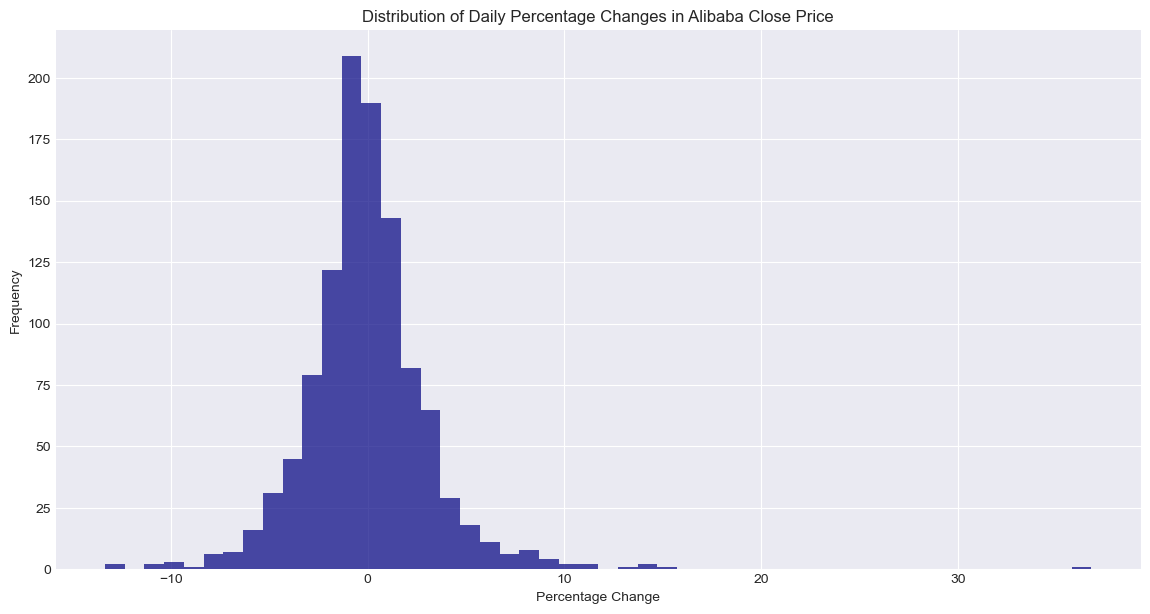

In [11]:
# Calculating daily percentage change
df['Daily_Change'] = df['Close'].pct_change() * 100

# Plotting the distribution of daily changes
plt.figure(figsize=(14, 7))
plt.hist(df['Daily_Change'].dropna(), bins=50, color='navy', alpha=0.7)
plt.title('Distribution of Daily Percentage Changes in Alibaba Close Price')
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

the histogram helps us understand the volatility of the stock price. Most daily changes cluster near zero, indicating many days with minor price changes.there are also tails on both sides, indicating days with significant price increases and decreases, especially around the start of the pandemic.

# XGBOOST Model

## Split the data chronologically

In [12]:
#df['Date'] = pd.to_datetime(df['Date'])


# Select relevant features
features = ['Open', 'High', 'Low', 'Volume', 'Adj Close']
target = 'Close'

# Split the data into features (X) and target (y)
X = df[features]
y = df[target]

cutoff = int(len(df) * 0.8)

X_train = X[:cutoff]
X_test = X[cutoff:]
y_train = y[:cutoff]
y_test = y[cutoff:]



# Check the shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((871, 5), (218, 5), (871,), (218,))

## chronological splitting:

Chronological splitting in time series preserves the order of the dates. This also maintains the trend of the time series, as the values are dependent. Therefore, we cannot use the train_test_split function.

## Model Error and score

In [13]:
# Initialize the XGBoost regressor
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = xgb_model.predict(X_test)

# Calculate performance metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)*100
r2 = r2_score(y_test, y_pred)

rmse, mape, r2

(0.741414342644128, 0.6862634050465518, 0.9923410644067268)

## Ali Baba's prediction plot

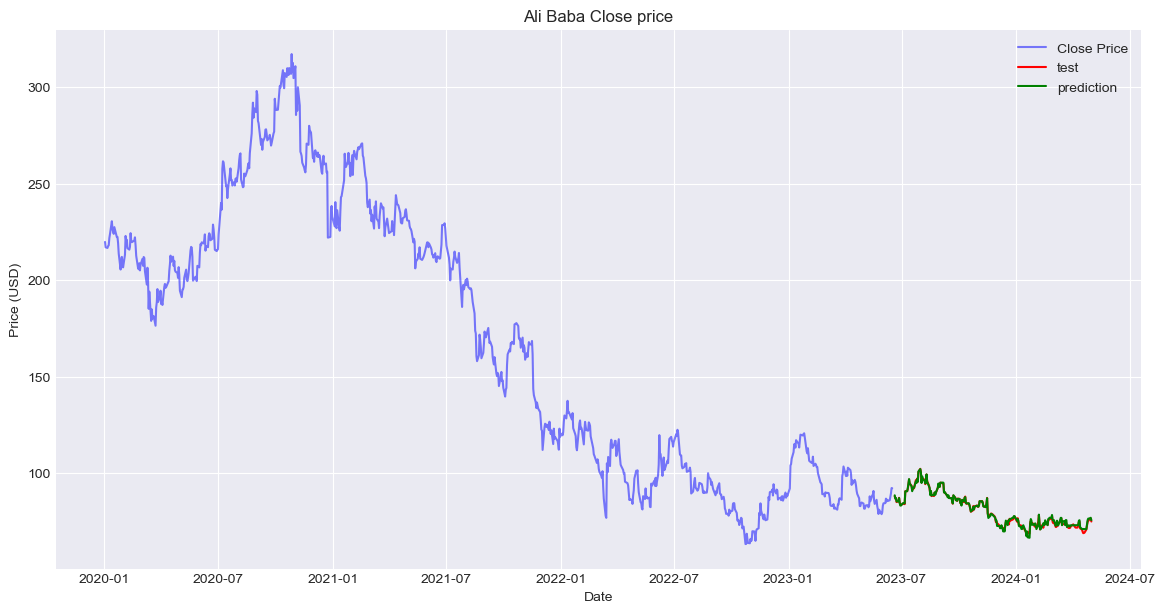

In [14]:
date = df['Date']

plt.figure(figsize=(14, 7))
plt.plot(date[:cutoff], y_train, label='Close Price', color='blue', alpha=0.5)
plt.plot(date[cutoff:], y_test, label='test', color='red')
plt.plot(date[cutoff:], y_pred, label='prediction', color='green')
plt.title('Ali Baba Close price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

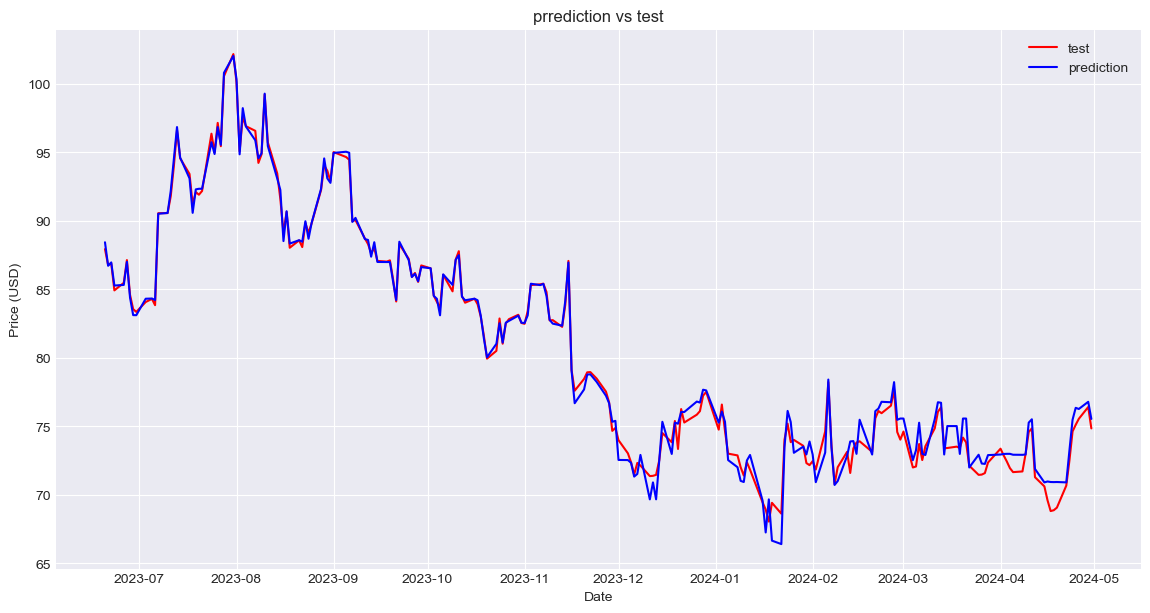

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(date[cutoff:], y_test, label='test', color='red')
plt.plot(date[cutoff:], y_pred, label='prediction', color='blue')
plt.title('prrediction vs test')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()